In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
TRAIN_PATH = '/home/luiz/repos/tcc_experiments_az_ml/data/samples/vrex_encoded_tf_idf_updated_2008_2009_2010_2011_2012_2013_2014_2015_2016_2017_.csv'
TEST_PATH = '/home/luiz/repos/tcc_experiments_az_ml/data/samples/vrex_encoded_tf_idf_updated_2018_2019_2020_2021_.csv'
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)


lbl_exploits_has
0    47120
1     1686
Name: count, dtype: int64


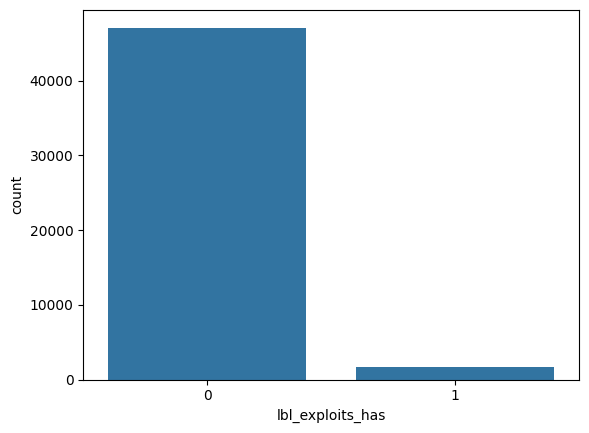

In [5]:
# Contar o número de exemplos em cada classe
class_counts = test_df['lbl_exploits_has'].value_counts()
print(class_counts)

# Visualizar a distribuição de classes
sns.countplot(x='lbl_exploits_has', data=test_df)
plt.show()

lbl_exploits_has
0    68223
1    10497
Name: count, dtype: int64


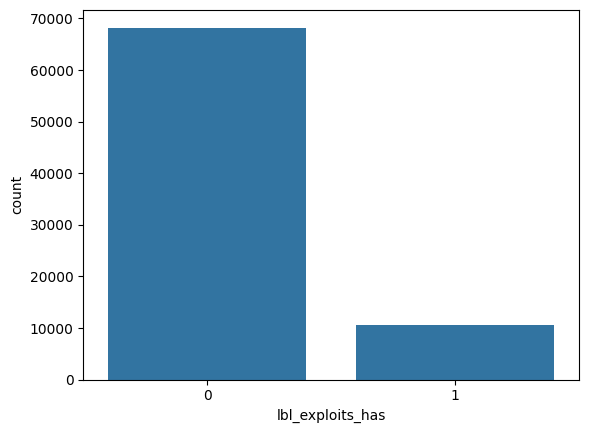

In [6]:
# Contar o número de exemplos em cada classe
class_counts = train_df['lbl_exploits_has'].value_counts()
print(class_counts)

# Visualizar a distribuição de classes
sns.countplot(x='lbl_exploits_has', data=train_df)
plt.show()